INSA ROUEN MS ESD 2019-2020
<br>
Winnie VORIHILALA

## TP1 MACHINE LEARNING : Décision bayesienne - Regression logistique

Objectifs de ce TP :

􏰀 - Mise en œuvre des méthodes LDA et QDA <br>
􏰀 - Mise en œuvre de la méthode de régression logistique <br>
􏰀 - Test sur des problèmes de classification binaire et multi-classe <br>

## 1 - Analyse discriminante linéaire et quadratique

## 1.1 Prise en main

In [1]:
# Chargement du script SimpleLDA_QDA.py disponible sur Moodle qui illustre les méthodes LDA et QDA 
#sur les données iris.

# coding: utf-8

#%% =========== Illustration de LDA et QDA ====
# Application sur les donnees Iris
# =============================================
#from __future__ import print_function
#from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

plt.close('all')

#%% ==== Trace de frontiere de decision en 2D
def plot_regions_decision_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)
    
# %% ### Dataset : IRIS (inclus dans Sklearn)
# Caractéristiques : 150 points, 4 variables, 3 classes
# chargement des donnees
iris = datasets.load_iris()
X, Y = iris.data, iris.target
print('Nombre de points : {}'.format(X.shape[0]))
print('Nombre de variables : {}'.format(X.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Y))))
classes, nbpoints = np.unique(Y, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))


Nombre de points : 150
Nombre de variables : 4
Nombre de classes : 3
Classe 0 comprend 50 points
Classe 1 comprend 50 points
Classe 2 comprend 50 points


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

LDA : taux derreur = 2.0%
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
QDA : taux derreur = 2.0%


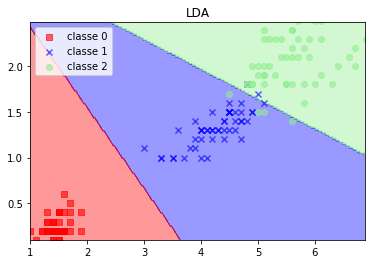

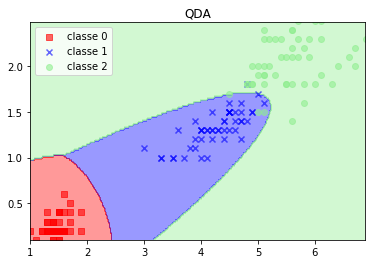

In [3]:
#%% ### Utilisation de LDA et QDA
# Remarque : la normalisation des donnees, le decoupage apprentissage/validation/test 
# sont omis dans cet exemple

# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True) # creation du modele LDA et utilisation du solveur svd qui est la décomposition en valeurs singulières
clf_lda.fit(X, Y) #entrainement du modèle avec les données de X et les classes correspondantes Y
Y_lda = clf_lda.predict(X) #calcul de la prédiction
err_lda = sum(Y_lda != Y)/Y.size # calcul de l'erreur, comparaison des classes prédites avec la vraie valeur des classes, 
print('LDA : taux d''erreur = {}%'.format(100*err_lda))

# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True) #on met true car on veut calculer la matrice de covariance et afficher le resultat plus tard,la valeur de ce paramètre par défaut est False
clf_qda.fit(X, Y)
print(clf_qda.means_)
Y_qda = clf_qda.predict(X)
err_qda = sum(Y_qda!= Y)/Y.size
print('QDA : taux d''erreur = {}%'.format(100*err_qda))


#%% ### Trace de la frontiere de decision en 2D
# Utilisation de 2 variables choisies parmi les 4. 
#On fait le modele LDA et QDA que pour ces variables

variables = [2, 3] #nous selectionnons au hasard 2 points pour visualiser le resultat 
## on ne fait ceci que pour le trace de la frontiere de decision de la LDA et QDA en 2D
classifieur = 'LDA'
clf_lda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_lda, 0.02, titre='LDA')
#
clf_qda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_qda, 0.02, titre='QDA')



Lien documentation scikit-learn : <br>
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html <br>

### 1 - Commentaire et explication sur les différentes étapes du programme ci-dessus 

Ce script SimpleLDA_QDA.py illustre les méthodes LDA et QDA sur les données iris. 

Les methodes de LDA (Analyse Discriminante Lineaire) et QDA (Analyse Discriminante Quadratique) permettent d'expliquer et de prédire l'appartenance d'un individu à une classe ou un groupe prédéfini à partir de ses caractéristiques mesurées à l'aide de variables prédictives.

Dans notre exemple ci-dessus, l'objectif est de prédire l'appartenance d'une fleur d'iris à l'une des 3 espèces/classes suivantes : Iris Setosa, Iris Versicolour et Iris Virginica, à partir de ses 4 caractéristiques/variables : les longueurs des sépales, les largeurs des sépales, les longeurs des pétales, les largeurs des pétales.

La QDA est un classifieur qui permet de séparer les mesures de 2 ou plusieurs classes d'objects ou d'événements par une surface quadratique. La QDA est une version générale du classifieur linéaire. La LDA est un cas particulier de la QDA où les mesures de 2 ou plusieurs classes d'objets ou d'événements sont séparés par une droite.

Nous pouvons constater cela dans le graphique ci-dessus : Nos points sont bien répartis dans 3 classes (classe 0, classe 1 et classe 2). Dans le cas de la LDA, les 3 classes sont séparés par des droites et dans le cas de la QDA, elles sont séparées par des paraboles.

Ce script calcule également le taux d'erreur qui représente le taux de mauvais classement ou le rapport entre le nombre de mauvaises prédictions et la taille de l’échantillon. Ce dernier est un indicateur simple de la matrice de confusion. Le taux d'erreur est un estimateur de la probabilité de se tromper si l’on applique la fonction de classement dans la population. Le taux d'erreur est un bon indicateur qui permet de comparer n'importe quelle méthode de classement,et de selectionner ainsi celle qui s'avère la plus performante. 

Dans notre exemple ci-dessus, la LDA et la QDA affichent le même taux d'erreur à 2%. Cela est du au fait que nos 150 points sont correctement répartis entre les 3 classes. Ce taux d'erreur identique signifie que ces 2 techniques sont aussi performantes l'une que l'autre et prédisent plutôt bien l'appartenance d'une fleur d'iris à l'une des 3 classes précisées plus haut. 


### 2- Affichage des centres et matrices de covariance de la LDA et QDA et commentaire

In [4]:
#Centres

# Parametres estimes par LDA
print(clf_lda.means_) 
# Parametres estimes par QDA 
print(clf_qda.means_) 

[[1.462 0.246]
 [4.26  1.326]
 [5.552 2.026]]
[[1.462 0.246]
 [4.26  1.326]
 [5.552 2.026]]


Les centres (ou moyennes) sont identiques car les 2 méthodes calculent la moyenne empirique sur chaque classe.

In [5]:
#Matrice de covariance

# Parametres estimes par LDA
print(clf_lda.covariance_)
# Parametres estimes par QDA 
print(clf_qda.covariance_)

[[0.181484 0.041812]
 [0.041812 0.041044]]
[array([[0.03015918, 0.00606939],
       [0.00606939, 0.01110612]]), array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]]), array([[0.30458776, 0.04882449],
       [0.04882449, 0.07543265]])]


Les matrices de covariance sont différentes car le calcul se fait sur toutes les données. <br>
NB : Dans le cadre de la LDA, on fait l'hypothèse que la matrice de covariance est la même pour chaque classe.

### 3- Visualisation des frontières de décision des 2 méthodes 

(cf graphes ci-dessus)

Les frontières de décision de la LDA sont des droites tandis que celles de la QDA sont des paraboles. Nous pouvons constater que dans ce jeu de données, les droites et les paraboles séparent quasi identiquemennt nos 3 classes de données.

## 1.2 Classification binaire

Une classification binaire est par définition une classification en 2 classes.

Les données à traiter ici (CTGSimple.csv) portent sur l’analyse de situations médicales. Ces données sont composées de 2126 observations et 23 attributs. <br>

La variable à prédire est la variable NSP, qui prend 3 valeurs : N (Normal), S (Suspect), P (Pathologic). <br>
<br>
2126 cardiotocogrammes fœtaux (CTG) ont été traités automatiquement et les caractéristiques de diagnostic respectives ont été mesurés. Les CTG ont également été classés par trois obstétriciens experts et une étiquette de classification consensuelle a été attribuée à chacun d'eux. La classification concernait à la fois un schéma morphologique (A, B, C. ...) et un état fœtal (N, S, P). Par conséquent, l'ensemble de données peut être utilisé pour des expériences à 10 ou 3 classes.

Voici ci-dessous les différentes informations sur les colonnes composants le jeu de données :

- LB - Ligne de base FHR (battements par minute)
- AC - # d'accélérations par seconde
- FM - nombre de mouvements fœtaux par seconde
- UC - Nombre de contractions utérines par seconde
- DL - Nombre de décélérations légères par seconde
- DS - Nombre de décélérations sévères par seconde
- DP - Nombre de décélérations prolongées par seconde
- ASTV - pourcentage de temps avec variabilité anormale à court terme
- MSTV - valeur moyenne de la variabilité à court terme
- ALTV - pourcentage de temps avec variabilité anormale à long terme
- MLTV - valeur moyenne de la variabilité à long terme
- Largeur - largeur de l'histogramme FHR
- Min - minimum d'histogramme FHR
- Max - Maximum de l'histogramme FHR
- Nmax - Nombre de pics d'histogramme
- Nzeros - Nombre de zéros d'histogramme
- Mode - mode histogramme
- Moyenne - moyenne de l'histogramme
- Médiane - médiane de l'histogramme
- Variance - variance d'histogramme
- Tendance - tendance histogramme
- CLASS - Code de classe de motif FHR (1 à 10)
- NSP - code de classe d'état fœtal (N = normal; S = suspect; P = pathologique)

### 1- Chargement des données sous Python

In [6]:
#Chargement du script CTGSimple.csv disponible sur moodle et sur https://archive.ics. uci.edu/ml/datasets/cardiotocography.
#et portant sur l'analyse de situations médicales

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1) #Chargement des données au format csv
print("Notre dataframe df a pour dimension : ", df.shape)
print(" ")
print("Visualisation des 5 premières lignes du dataframe df : ")
print(df.head())
Y = df["NSP"].values #attribution des valeurs de la colonne NSP à Y qu représente la variable cible
print(" ")
print(" La variable cible Y a pour dimension : ",Y.shape)
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV",
    "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values #attribution de plusieurs variables à X qui représente l'ensemble des variables explicatives
print(" ")
print("L'ensemble de nos variables explicatives X a pour dimension :", X.shape)

Notre dataframe df a pour dimension :  (2126, 42)
 
Visualisation des 5 premières lignes du dataframe df : 
     b     e  AC  FM  UC  DL  DS  DP  DR   LB  ...  C  D  E  AD  DE  LD  FS  \
0  240   357   0   0   0   0   0   0   0  120  ... -1 -1 -1  -1  -1  -1   1   
1    5   632   4   0   4   2   0   0   0  132  ... -1 -1 -1   1  -1  -1  -1   
2  177   779   2   0   5   2   0   0   0  133  ... -1 -1 -1   1  -1  -1  -1   
3  411  1192   2   0   6   2   0   0   0  134  ... -1 -1 -1   1  -1  -1  -1   
4  533  1147   4   0   5   0   0   0   0  132  ... -1 -1 -1  -1  -1  -1  -1   

   SUSP  CLASS  NSP  
0    -1      9    2  
1    -1      6    1  
2    -1      6    1  
3    -1      6    1  
4    -1      2    1  

[5 rows x 42 columns]
 
 La variable cible Y a pour dimension :  (2126,)
 
L'ensemble de nos variables explicatives X a pour dimension : (2126, 21)


### 2- Analyse statistique

Classe 1 contient 1655 points
Classe 2 contient 295 points
Classe 3 contient 176 points


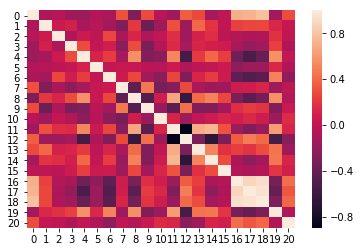

In [9]:
import matplotlib.pyplot as plt

uniqLabels, counts = np.unique(Y, return_counts=True) 
for i, lab in enumerate(uniqLabels):
    print( "Classe {} contient {} points".format(lab, counts[i])) 
corr_mat = np.corrcoef(X.T)
sb.heatmap(corr_mat)
# trace des boxplot
#fig, ax = plt.subplots(figsize=(5, 5))
#sb.boxplot(X, orient="v", palette="Set1",width=1.5,notch=True,ax=ax)

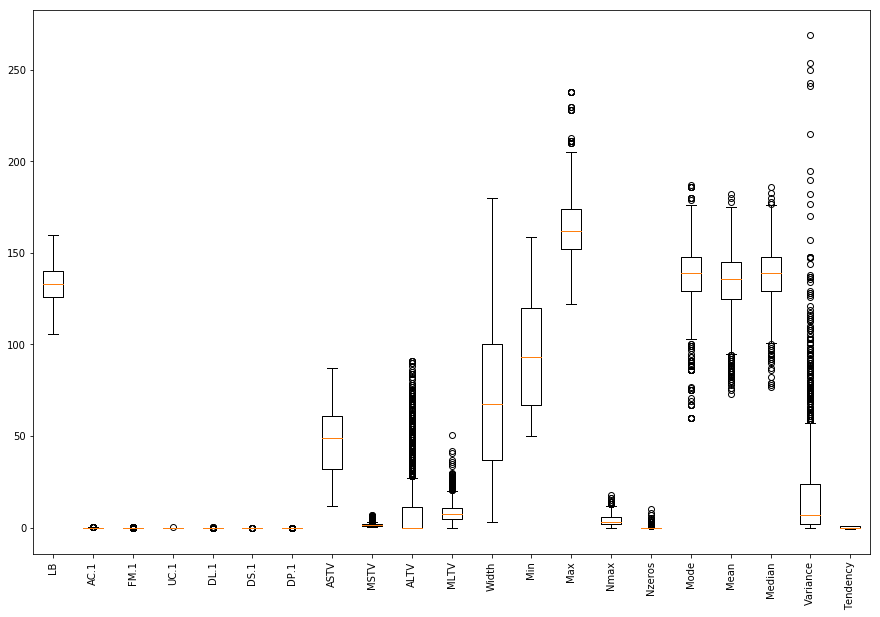

In [10]:
#fig, ax = plt.subplots(figsize=(15,10)) #redimensionner ma boxplot
#plt.boxplot(X)
#plt.show()

plt.figure(figsize=(15,10))
box = plt.boxplot(X)
box = plt.xticks([i + 1 for i in range(0,21)], variables, rotation='vertical') #pour afficher les noms de colonnes en abscisse


On constate après observation de la boxplot que les variables n'ont pas tous le même ordre de grandeur (par exemple certaines vont jusqu'à 250 alors que d'autres vont jusqu'à 10 maximum). Elles doivent par conséquent être normalisées afin de ne pas fausser notre prédiction. <br>

### Transformation du problème en un problème de classification binaire par fusion des classes 2 et 3 en une seule

In [11]:
#Visualisation de Y
dfY=pd.DataFrame(Y)
print(dfY)

      0
0     2
1     1
2     1
3     1
4     1
5     3
6     3
7     3
8     3
9     3
10    2
11    2
12    1
13    1
14    1
15    1
16    1
17    2
18    1
19    1
20    3
21    1
22    3
23    3
24    3
25    3
26    3
27    3
28    2
29    1
...  ..
2096  1
2097  1
2098  1
2099  1
2100  1
2101  1
2102  1
2103  1
2104  1
2105  1
2106  1
2107  1
2108  1
2109  1
2110  1
2111  1
2112  1
2113  1
2114  1
2115  1
2116  1
2117  1
2118  1
2119  1
2120  1
2121  2
2122  2
2123  2
2124  2
2125  1

[2126 rows x 1 columns]


Nous constatons que la variable cible Y est bien constituée de 3 classes 1, 2 et 3

In [12]:
#Fusion des classes 2 et 3 en une seule
classe = 3
Y[np.in1d(Y, classe)] = 2 #merge des classe 3 et 3 classe 2
dfY1=pd.DataFrame(Y)
print(dfY1)

      0
0     2
1     1
2     1
3     1
4     1
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    1
13    1
14    1
15    1
16    1
17    2
18    1
19    1
20    2
21    1
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    1
...  ..
2096  1
2097  1
2098  1
2099  1
2100  1
2101  1
2102  1
2103  1
2104  1
2105  1
2106  1
2107  1
2108  1
2109  1
2110  1
2111  1
2112  1
2113  1
2114  1
2115  1
2116  1
2117  1
2118  1
2119  1
2120  1
2121  2
2122  2
2123  2
2124  2
2125  1

[2126 rows x 1 columns]


La variable Y est maintenant constituée de 2 classes 1 et 2.

### 3- Séparation des données en deux ensembles : apprentissage et test

In [13]:
 Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.5, stratify=Y) #Séparation à 50% app, 50% test

Le paramètre shuffle permet d'indiquer s'il faut ou non mélanger les données avant le split.
Le paramètre stratify permet de répartir équitablement les données dans les différentes classes lors du split. stratify prend en argument Y.
Shuffle prend TRUE par défault et stratify prend None par défaut. Si shuffle est égal à FALSE, stratify doit obligatoirement être égal à None.
<br>
Test_size égal à 0,5 permet de diviser notre jeu de données en deux sous-ensemble de taille égale.

In [14]:
print(" Notre jeu de données d'apprentissage a pour dimension : Xa = ", Xa.shape, "et Ya = ", Ya.shape)
print(" Notre jeu de données de test a pour dimension : Xt = ", Xt.shape, "et Yt", Yt.shape)

 Notre jeu de données d'apprentissage a pour dimension : Xa =  (1063, 21) et Ya =  (1063,)
 Notre jeu de données de test a pour dimension : Xt =  (1063, 21) et Yt (1063,)


### 4- Centrer et réduire les données (le jeu d’apprentissage sert de référence)

In [15]:
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa) #NB :ne jamais faire de fit sur les donnees de test car cela équivaut à biaiser le jeu de test
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

Il est necessaire de faire la mise à l'échelle (calculer moyenne et ecart type, puis stocker ces valeurs) avant d'appliquer la transformation, l'ordre est important, l'inverse ne marche pas, il est également possible d'utilser la fonction fit_transform(self, X[, y]) qui va procéder de la même manière, c'est-à-dire d'abord fit-er les données puis les transformer. En revanche il n'est pas conseillé de faire l’enchaînement d’instructions suivantes pour la normalisation : 
- sc = sc.fit(Xa) ; 
- Xa = sc.transform(Xa) ; 
- sc = sc.fit(Xt) ; 
- Xt = sc.transform(Xt). 

Le fit doit se faire uniquement sur notre échantillon d'apprentissage et jamais sur l'échantillon de test car cela équivaut à biaiser ce dernier. Le modèle prédictif doit s'appliquer aux vrais données et non pas à des données tests modifiées.

### 5- Classification par la LDA et QDA sur les données d'apprentissage et de test

### Application de la LDA et QDA sur les données d'apprentissage et de test

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(Xa, Ya)
Y_lda = clf_lda.predict(Xa) # prédiction sur les données d'apprentissage
err_lda = sum(Y_lda != Ya)/Ya.size #erreur sur les données d'apprentissage
print('LDA : taux d''erreur apprentissage = {}%'.format(100*err_lda)) 
Y_ldat = clf_lda.predict(Xt) # prédiction sur les données de test
err_ldat = sum(Y_ldat != Yt)/Yt.size #erreur sur les données de test 
print('LDA : taux d''erreur test= {}%'.format(100*err_ldat))

print("\n") #saut de ligne en python

# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True) #création du modèle QDA
clf_qda.fit(Xa, Ya) #entrainement du modèle QDA sur les données de Xa avec les classes de Ya
Y_qda = clf_qda.predict(Xa) # prédiction sur les données d'apprentissage
err_qda = sum(Y_qda!= Ya)/Ya.size #erreur sur les données d'apprentissage
print('QDA : taux d''erreur apprentissage = {}%'.format(100*err_qda))
Y_qdat = clf_qda.predict(Xt) # prédiction sur les données de test
err_qdat = sum(Y_qdat!= Yt)/Yt.size #erreur sur les données de test
print('QDA : taux d''erreur test = {}%'.format(100*err_qdat))

LDA : taux derreur apprentissage = 8.936970837253057%
LDA : taux derreur test= 12.041392285983067%


QDA : taux derreur apprentissage = 19.09689557855127%
QDA : taux derreur test = 18.438381937911572%


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Avec la QDA, nous obtenons un taux d'erreur plus important qu'avec la LDA. Cela peut être expliqué par le fait que plus un classifieur est complexe, plus le risque de sur-apprentissage est grand, et par conséquent plus le taux d'erreur sera élevé. Par ailleurs, la QDA aggrandit la dimension des données, or le degré de complexité d'un classifieur est lié à la dimension. Plus la dimension est grande, plus le degré de compléxité sera grande, plus le risque de sur apprentissage est grand, et par conséquent plus le taux d'erreur sera élevé.

Un classifieur trop simple ne sera efficace ni sur les données d'apprentissage ni sur les données de test. Il est  important de trouver le bon degré de complexité du classifieur pour obtenir un classifieur efficace. <br>

NB : L'écart entre l'erreur sur les données d'apprentissage et l'erreur sur les données de test ne doit pas non plus être trp grande sinon il y a probablement suraprentissage.

## 1.3 - Cas multi-classe : données Mnist

Dans cette partie, nous allons illustrer le fait que la méthode LDA s’applique de façon directe sur des problèmes de classification multi-classes. On considère les données Mnist qui comportent des images de chiffres manuscrits (0 à 9) qu’on veut classer. <br>
Le dataset Mnist est une base de données de chiffres écrits à la main. Il regroupe 60000 images d'apprentissage et 10000 images de test, issues d'une base de données antérieure, appelée simplement NIST. Ce sont des images en noir et blanc, normalisées centrées de 28 pixels de côté. <br>
<br>
Au total il y a 784 pixels qui forment nos 784 variables explicatives. Le but est donc de classifier chaque image à partir des 784 attributs.

### 1- Charger les données

In [33]:
import scipy.io as sio #bibliotheque en python à usage scientifique utilisant les tableaux et matrices du module NumPy

digits_app = sio.loadmat("mnist-app.mat") # chargement des données mnist d'apprentissage
Xam, Yam = digits_app["Xa"], digits_app["Ya"][:,0] #séparation des données d'apprentissage en X et Y (variables explicatives et variable cible)
digits_test = sio.loadmat("mnist-test.mat") # chargement des données mnist de test
Xtm, Ytm = digits_test["Xt"], digits_test["Yt"][:,0] #séparation des données de test en X et Y (variables explicatives et variable cible)
print(" Notre jeu de données d'apprentissage a pour dimension : Xam = ", Xam.shape, "et Yam = ", Yam.shape) #affichage des dimensions
print(" Notre jeu de données de test a pour dimension : Xt = ", Xtm.shape, "et Yt", Ytm.shape) #affichage des dimensions

 Notre jeu de données d'apprentissage a pour dimension : Xam =  (60000, 784) et Yam =  (60000,)
 Notre jeu de données de test a pour dimension : Xt =  (10000, 784) et Yt (10000,)


Nous allons selectionner uniquement les variables donc la variance est supériere à 0.001. Cela permettra de garder que les variables qui influent vraiment sur la classification.

### 2- Analyse statistique sur les données d'apprentissage

In [34]:
import matplotlib.pyplot as plt

uniqLabels, counts = np.unique(Yam, return_counts=True) 
for i, lab in enumerate(uniqLabels):
    print( "Classe {} contient {} points".format(lab, counts[i])) 

Classe 0 contient 5923 points
Classe 1 contient 6742 points
Classe 2 contient 5958 points
Classe 3 contient 6131 points
Classe 4 contient 5842 points
Classe 5 contient 5421 points
Classe 6 contient 5918 points
Classe 7 contient 6265 points
Classe 8 contient 5851 points
Classe 9 contient 5949 points


Notre jeu de données cible (construit avec les données mnist d'apprentissage) contient 9 classes. <br>
On constate également que les points sont équitablement répartis entre les classes.

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2529: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2529: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


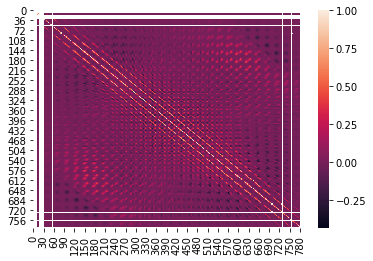

In [35]:
corr_mat = np.corrcoef(Xam.T) #matrice de correlation sur les données Xam (ensemble des variables explicatives sur les données d'apprentissage)

sb.heatmap(corr_mat)

Le jeu de données ayant une trop grande dimension, la matrice de corrélation n'étant pas trop lisible.

### Etude de la variance des variables

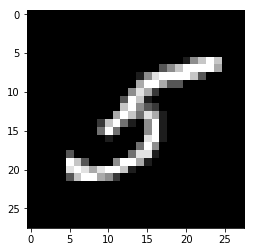

In [41]:
plt.imshow(Xam[35].reshape(28,28), cmap='gray') #affichage d'un point quelconque et utilisation de la fonction cmap

In [42]:
#calcul de la variance v_a de Xam
v_a=[]
for i in range(0,784) :
    v_a.append((np.var(Xam[:,i])))

In [43]:
print(v_a)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2259289233333334, 1.8528053055555558, 0.7775870400000003, 0.0013499775000000006, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004266595555555557, 0.037882493055555536, 1.113030486388889, 4.389426986388889, 8.77367218638889, 11.047991189999998, 23.709667982222225, 30.569698128888902, 32.417443499722225, 32.416317412222234, 35.08214253305557, 33.24758844416667, 35.645222595555566, 29.304641677500012, 18.752859986388884, 13.81259247888889, 10.29552043305556, 3.775510132222221, 1.4670816597222218, 0.6505541822222223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06826552888888889, 0.01683284333333334, 0.6650350308333332, 0.20931993305555557, 7.118381590000002, 24.944278773333334, 50.92555716638888, 94.3689228863889, 167.19335775999997, 241.49100165972212, 354.2043742108334, 482.4347696641665, 614.6989340530556, 686.2921371975, 718.2021900663891, 662.1181211641667, 541.700964728889, 402.5823801197223, 233.

Certaines variances sont egales à zero, ce qui est normal car elles correspondent aux surfaces noires des grapes (cf exemple de graphique ci-dessus, X[35].  

### Selection des données avec une variance supérieure à 0,001

In [53]:
tol = 1e-3
std_a = np.std(Xam, 0) #calcule l'ecart type le long de l'axe spécifié, 0 pour ligne et 1 pour colonne
idx_var = np.squeeze(np.where(std_a > tol))
Xam = Xam[:, idx_var]
Xtm = Xtm[:, idx_var]
print(" Après sélection, notre jeu de données d'apprentissage a pour dimension : Xam = ", Xam.shape, "et Yam = ", Yam.shape)
print(" Après selection, notre jeu de données de test a pour dimension : Xtm = ", Xtm.shape, "et Ytm", Ytm.shape)

 Après sélection, notre jeu de données d'apprentissage a pour dimension : Xam =  (60000, 717) et Yam =  (60000,)
 Après selection, notre jeu de données de test a pour dimension : Xtm =  (10000, 717) et Ytm (10000,)


67 variables ont donc été éliminées car présentaient des variances non significatives (inférieures à 0,001)

### Normalisation des données 

Les données ayant le même ordre de grandeur, une normalisation n'est pas nécessaire ici.

In [ ]:
#sc = StandardScaler(with_mean=True, with_std=True)
#sc = sc.fit(Xam)
#Xam = sc.transform(Xam)
#Xtm = sc.transform(Xtm)

### Application de la LDA et de la QDA sur des données d'apprentissage et de test

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(Xam, Yam)

Y_lda = clf_lda.predict(Xam)
err_lda = sum(Y_lda != Yam)/Yam.size
print("LDA : taux d''erreur sur les données d''apprentissage = {}%".format(100*err_lda))

Y_ldat = clf_lda.predict(Xtm)
err_ldat = sum(Y_ldat != Ytm)/Ytm.size
print("LDA : taux d''erreur sur les données de test= {}%".format(100*err_ldat))

/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA : taux d''erreur sur les données d''apprentissage = 12.851666666666667%
LDA : taux d''erreur sur les données de test= 12.7%


Important : plus la variabilité de la variance des données est grande, plus les données sont dispersées et éloignées entre elles, plus il devient difficile de prédire leur appartenance aux classes.

# Régression logistique sur problème de classification binaire

Le but ici est d’appliquer la méthode de régression linéaire sur les données des exercices 1.2 et 1.3 et de comparer les résultats obtenus avec l’approche LDA. Pour rappel, le problème à résoudre est le suivant : <br> 
$$
min_{\theta} CJ(\theta) + \Omega(\theta)
$$
- avec $C > 0$ : un paramètre de régularisation fixé par l’utilisateur 
- avec $\Omega (\theta)$ : le terme de régularisation 
- $-J$ : la log-vraisemblance

Le script suivant illustre la régression logistique sur les données <strong>iris</strong>. 
Dans ce script, on decoupe le jeu de données en jeu d'apprentisage et jeu de validation en spécifiant la taille du jeu de données de validation (égale à 1/2 soit la moitié de notre jeu de donnée total). La valeur par défaut de ce paramètre est de 1/4.

Dans un premier temps, le jeu de données est séparé en un jeu de données d'apprentissage et un jeu de données de validation. Un modèle de régression logistique est instancié avec une tolérance de  1e−5
 , une valeur de multi_class égale à "multinomial" (car les données sont regroupées en 3 classes). La régression contient un hyper-paramètre  C
  qu'il va falloir choisir de façon à ce que notre modèle donne le meilleur résultat possible. Pour chaque valeur de  C
 , une régression logistique est entraînée sur les données d'apprentissage puis le modèle est utilisé en prédiction sur les données de validation. Le taux d'erreur en apprentissage et en validation (calculées grâce à la fonction <strong>accuracy_score</strong> de Scikit-Learn) sont stockées dans un tableau. Une fois tous les  C
  testés, le  C
  optimal est celui qui donne le taux d'erreur le plus bas sur la prédiction des données de validation. On peut alors obtenir le modèle final en entraînant la regression logistique sur les données d'apprentissage avec le  C
  optimal. Puis le modèle est utilisé pour prédire les données de validation.

In [21]:
# coding: utf-8

# # Regression logistique
# Application sur les donnees Iris

from __future__ import print_function
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model #régression linéaire (variables quantitatives) ou logistiques (variables catégorielles)
from sklearn import datasets #data iris s'y trouvent ainsi que d'autres datasets
from sklearn.metrics import accuracy_score #metrique
from sklearn.model_selection import train_test_split

plt.close("all")

#%% ==== Trace de frontiere de decision en 2D
def plot_regions_decision_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)
    
#%% ### Dataset : IRIS (inclus dans Sklearn)
iris = datasets.load_iris()
X, Y = iris.data, iris.target

#%% ### Decoupage des donnees en jeu d'apprentissage et de validation
# Remarque : la normalisation des donnees est omise dans ce exemple

Xa, Xv, Ya, Yv = train_test_split(X, Y, shuffle=True, test_size=1/2, stratify=Y)
print(" Notre jeu de données d'apprentissage a pour dimension : Xa = ", Xa.shape, "et Ya = ", Ya.shape)
print(" Notre jeu de données de test a pour dimension : Xt = ", Xv.shape, "et Yt", Yv.shape)

 Notre jeu de données d'apprentissage a pour dimension : Xa =  (75, 4) et Ya =  (75,)
 Notre jeu de données de test a pour dimension : Xt =  (75, 4) et Yt (75,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Valeur de Copt = 3.7275937203149416
Err validation correspondante = 5.333333333333334
Err apprentissage correspondante = 2.6666666666666616


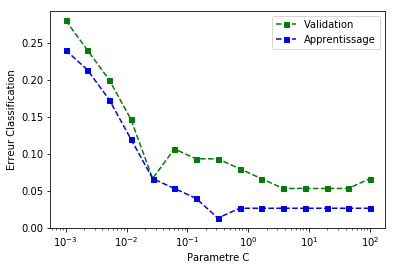

In [22]:
#%% ### Selection de l'hyper-parametre C 

clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs') #lbfgs : newton, ne passe pas si trop de donnees, 
#cf doc sklearn.linear_model.LogisticRegression avec les différentes valeurs des paramètres (pénalité Ridge, Lasso, ElasticNet etc) 
    
vectC = np.logspace(-3, 2, 15) #len(vectC=15)
err_app = np.empty(vectC.shape[0])
err_val = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    clf_reglog.C = C #100
    clf_reglog.fit(Xa, Ya)
    err_val[ind_C] = 1 - accuracy_score(Yv, clf_reglog.predict(Xv))
    err_app[ind_C] = 1 - accuracy_score(Ya, clf_reglog.predict(Xa))

# Choix du meilleur C
err_min_val, ind_min = err_val.min(), err_val.argmin() #0.053 et 10
Copt = vectC[ind_min] #3.72


#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, err_val, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')

#%% ##### Model final
clf_reglog.C = Copt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(Copt ))
print('Err validation correspondante = {}'.format(100*(1 - accuracy_score(Yv, clf_reglog.predict(Xv)))))
print('Err apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))


#%% ### Trace de la frontiere de decision en 2D
# Utilisation de 2 variables choisies parmi les 4.
# trace frontiere de decision en fonction de certaines variables choisies
#variables = [2, 3]
## on re-apprend le modele avec Coptimal 
#clf_reglog.C = Copt
#clf_reglog.fit(Xa[:,variables], Ya) 
#plot_regions_decision_2d(Xa[:,variables], Ya, clf, 0.02, titre='{}'.format("Regression Logistique"))

Graphiquement, on retrouve la valeur du C optimal qui corresspond au point où la coubre de validation (en vert) est minimal.

Dans les domaines de la reconnaissance de formes, de la recherche d'information et de la classification automatique : <br>
- la <strong> précision </strong> (ou valeur prédictive positive) est la proportion des items pertinents parmi l'ensemble des items proposés <br>
- le <strong> rappel (ou sensibilité) </strong> est la proportion des items pertinents proposés parmi l'ensemble des items pertinents. <br>
<br>

Ces deux notions correspondent ainsi à une conception et à une mesure de la pertinence. <br>

Lorsqu'un moteur de recherche, par exemple, retourne 30 pages web dont seulement 20 sont pertinentes (les vrais positifs) et 10 ne le sont pas (les faux positifs), mais qu'il omet 40 autres pages pertinentes (les faux négatifs), sa précision est de 20/30 = 2/3 et son rappel vaut 20/(20+40) = 1/3.

La précision peut ainsi être comprise comme une mesure de l'exactitude ou de la qualité, tandis que le rappel est une mesure de l'exhaustivité ou de la quantité.

- La précision est le nombre de documents pertinents retrouvés rapporté au nombre de documents total proposé pour une requête donnée.

Le principe est le suivant : quand un utilisateur interroge une base de données, il souhaite que les documents proposés en réponse à son interrogation correspondent à son attente. Tous les documents retournés superflus ou non pertinents constituent du bruit. La précision s’oppose à ce bruit documentaire. Si elle est élevée, cela signifie que peu de documents inutiles sont proposés par le système et que ce dernier peut être considéré comme « précis ». On calcule la précision avec la formule suivante :
<br>
<center> <strong> précision = nb de documents correctement attribués à la classe / nb de documents attribués à la classe </strong> </center> 
<center> <strong>Précision = TP + TN / TP + FP + FN + TN </strong></center> 
<center> <strong> Précision = TP / TP + FP </strong> </center>
<br>
avec : <br>
- TP : True Positive <br>
- TN : True Negative <br>
- FP : False Positive <br>
- FN : False Negative <br>

En statistique, la précision est appelée valeur prédictive positive.(y_true)

- Le rappel est défini par le nombre de documents pertinents retrouvés au regard du nombre de documents pertinents que possède la base de données.

Cela signifie que lorsque l’utilisateur interroge la base, il souhaite voir apparaître tous les documents qui pourraient répondre à son besoin d'information. Si cette adéquation entre le questionnement de l’utilisateur et le nombre de documents présentés est importante alors le taux de rappel est élevé. À l’inverse, si le système possède de nombreux documents intéressants mais que ceux-ci n’apparaissent pas dans la liste des réponses, on parle de silence. Le silence s’oppose au rappel. Le rappel est donc calculé comme suit :
<br>
<center> <strong>rappel = nb de documents correctement attribués à la classe / nb de documents appartenant à la classe </strong> </center> 
<center> <strong>rappel = TP / TP + FN </strong> </center> 
<br>
En statistique, le rappel est appelé sensibilité.

<br>
<strong> *** Interprétation des résultats : </strong>
Un système de recherche documentaire parfait fournira des réponses dont la précision et le rappel sont égaux à 1 (l'algorithme trouve la totalité des documents pertinents - rappel - et ne fait aucune erreur - précision). Dans la réalité, les algorithmes de recherche sont plus ou moins précis et plus ou moins pertinents. Il est possible d'obtenir un système très précis (par exemple un score de précision de 0,99), mais peu performant (par exemple avec un rappel de 0,10, qui signifiera qu'il n'a trouvé que 10 % des réponses possibles). De même, un algorithme dont le rappel est fort (par exemple 0,99, soit la quasi-totalité des documents pertinents), mais la précision faible (par exemple 0,10) fournira en guise de réponse de nombreux documents erronés en plus de ceux pertinents : il sera donc difficilement exploitable.

Ainsi, dans les cas limites, un système de recherche documentaire qui renvoie la totalité des documents de sa base aura un rappel de 1 mais une mauvaise précision, tandis qu'un système de recherche qui renvoie uniquement la requête de l'utilisateur aura une précision de 1 pour un rappel très faible. La valeur d'un classifieur ne se réduit donc pas à un bon score en précision ou en rappel.

<br>
<strong> *** Dans le cadre multi-classe : </strong>
Dans le cadre multi-classes (où le nombre n de classes de données est supérieur à 1), les moyennes globales de la précision et du rappel sur l'ensemble des classes i peuvent être évaluées par la macro-moyenne qui calcule d'abord la précision et le rappel sur chaque classe i suivie d'un calcul de la moyenne des précisions et des rappels sur les n classes :
<center> <strong> précision = somme des précisions i pour i allant de 1 à n / n </strong> </center> 
<br>
<center> <strong> rappel = somme des rappels i pour i allant de 1 à n / n </strong> </center> 
<br>
<br>
Une mesure qui combine la précision et le rappel est leur moyenne harmonique, nommée F-mesure ou F-score:
<center> <strong> F1-score = 2(precision * rappel / precision + rappel) </strong> </center> 
<br>
Elle est également connue sous le nom de F1-score car précision et rappel sont pondérés de façon égale. Il s'agit d'un cas particulier de la mesure générale :
<center> <strong> F-score = (1+beta au carré) * (precision * rappel) / (beta au carré) * (precision + rappel) </strong> </center> 
<br>

### 2- Calcul des probabilités a posteriori des classes et déduction de la prédiction, au sens du maximum de probabilité a posteriori, de la classe des points de validation 

In [30]:
#import matplotlib.pyplot as plt 
#import matplotlib.pyplot.clf as clf

proba = clf_reglog.predict_proba(Xv) #Prediction
ypredv = np.argmax(proba, axis=1)
print("Err val = {}".format(100*(1-accuracy_score(Yv, ypredv))))

Err val = 5.333333333333334


Est ce que cette ligne de code ci-dessus est vriment pertinente ?

# 2- Regression logistique sur problème de classification binaire

## 1 - Regression logistique sur les données CTGSimple.csv

### Chargement des données 

In [37]:
#Chargement du script CTGSimple.csv disponible sur moodle et sur https://archive.ics. uci.edu/ml/datasets/cardiotocography.
#et portant sur l'analyse de situations médicales

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
print("Notre dataframe df a pour dimension : ", df.shape)
print(" ")
print("Visualisation des 5 premières lignes du dataframe df : ")
print(df.head())
Y = df["NSP"].values #.values est pratique car récupère les valeurs d'une colonne et les transpose en ligne, on pert le nom de la colonne
print(" ")
print(" La variable cible Y a pour dimension : ",Y.shape)
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV",
    "MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values
print(" ")
print("L'ensemble de nos variables explicatives X a pour dimension :", X.shape)
print(" ")
print(X)
print(" ")
print(Y)


Notre dataframe df a pour dimension :  (2126, 42)
 
Visualisation des 5 premières lignes du dataframe df : 
     b     e  AC  FM  UC  DL  DS  DP  DR   LB  ...  C  D  E  AD  DE  LD  FS  \
0  240   357   0   0   0   0   0   0   0  120  ... -1 -1 -1  -1  -1  -1   1   
1    5   632   4   0   4   2   0   0   0  132  ... -1 -1 -1   1  -1  -1  -1   
2  177   779   2   0   5   2   0   0   0  133  ... -1 -1 -1   1  -1  -1  -1   
3  411  1192   2   0   6   2   0   0   0  134  ... -1 -1 -1   1  -1  -1  -1   
4  533  1147   4   0   5   0   0   0   0  132  ... -1 -1 -1  -1  -1  -1  -1   

   SUSP  CLASS  NSP  
0    -1      9    2  
1    -1      6    1  
2    -1      6    1  
3    -1      6    1  
4    -1      2    1  

[5 rows x 42 columns]
 
 La variable cible Y a pour dimension :  (2126,)
 
L'ensemble de nos variables explicatives X a pour dimension : (2126, 21)
 
[[1.20e+02 0.00e+00 0.00e+00 ... 1.21e+02 7.30e+01 1.00e+00]
 [1.32e+02 6.00e-03 0.00e+00 ... 1.40e+02 1.20e+01 0.00e+00]
 [1.33e+02 3

### Transformation du problème en problème de classification binaire

In [38]:
#Fusion des classes 2 et 3 en une seule
classe = 3
Y[np.in1d(Y, classe)] = 2
dfY1=pd.DataFrame(Y)
print(dfY1)

      0
0     2
1     1
2     1
3     1
4     1
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    1
13    1
14    1
15    1
16    1
17    2
18    1
19    1
20    2
21    1
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    1
...  ..
2096  1
2097  1
2098  1
2099  1
2100  1
2101  1
2102  1
2103  1
2104  1
2105  1
2106  1
2107  1
2108  1
2109  1
2110  1
2111  1
2112  1
2113  1
2114  1
2115  1
2116  1
2117  1
2118  1
2119  1
2120  1
2121  2
2122  2
2123  2
2124  2
2125  1

[2126 rows x 1 columns]


### Décomposition des données ainsi obtenues en 3 parties : apprentissage, validation et test

In [39]:
from sklearn.model_selection import train_test_split

Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.3, stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)
print(" Notre jeu de données initiale a pour dimension : X = ", X.shape, "et Y = ", Y.shape)
print(" Notre jeu de données d'apprentissage a pour dimension : Xa = ", Xa.shape, "et Ya = ", Ya.shape)
print(" Notre jeu de données de validation a pour dimension : Xv = ", Xv.shape, "et Yv = ", Yv.shape)
print(" Notre jeu de données de test a pour dimension : Xt = ", Xt.shape, "et Yt = ", Yt.shape)

 Notre jeu de données initiale a pour dimension : X =  (2126, 21) et Y =  (2126,)
 Notre jeu de données d'apprentissage a pour dimension : Xa =  (1041, 21) et Ya =  (1041,)
 Notre jeu de données de validation a pour dimension : Xv =  (447, 21) et Yv =  (447,)
 Notre jeu de données de test a pour dimension : Xt =  (638, 21) et Yt =  (638,)


### Normalisation des données 

In [40]:
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

### Mise en oeuvre de la méthode de régression logistique avec utilisation de kfold pour trouver une valeur optimale du paramètre de régularisation C

Nous allons utiliser la méthode K folds comme vu dans le TP 1 afin de trouver la valeur optimale de C

In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3) #k = 3
i = 1

vectC = np.logspace(-3, 2, 15)

perf_val = [[], [], []]
decoupage = 0

for train , valid in kf.split(Xa):
    X_train = Xa[train,:]
    Y_train = Ya[train]
    X_valid = Xa[valid,:]
    Y_valid = Ya[valid]

#%% ### Selection de l'hyper-parametre C 

    for c in vectC : 
        clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs') 
        #lbfgs : newton, ne passe pas si trop de données 
        clf_reglog.C = c
        clf_reglog.fit(X_train, Y_train)
        perf_val[decoupage].append(1 - accuracy_score(Y_valid, clf_reglog.predict(X_valid)))
    decoupage += 1

perf_globale = np.zeros((len(vectC), 1))
for i in range(0, len(vectC)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i]
    perf_globale[i] /= 3
c_opt = vectC[np.argmin(perf_globale)]
print('Le C optimal est %.3f. ' %c_opt)

Le C optimal est 0.139. 


In [42]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = c_opt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(c_opt ))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))
print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 0.13894954943731375
Err classification en test correspondante = 8.62068965517241
Err classification en apprentissage correspondante = 9.702209414024976


Nous obtenons ainsi de meilleurs résultats en test que pour la LDA et la QDA puisque nous avions obtenu les résultats suivants : (10% versus 11% avec LDA et 18% avec QDA)
- LDA : taux derreur apprentissage = 9.971777986829727%
- LDA : taux derreur test= 11.100658513640639%
- QDA : taux derreur apprentissage = 18.25023518344309%
- QDA : taux derreur test = 18.344308560677327%

### Affichage maintenant la matrice de confusion

Text(0, 0.5, 'Vrai label')

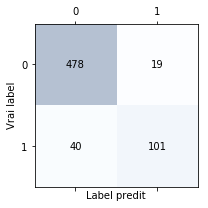

In [127]:
from sklearn.metrics import confusion_matrix

# Ici on suppose que le modèle de régression logistique est nommé clf_reglog dans le code
# prédiction des labels des données de test
ypred_test = clf_reglog.predict(Xt)

# matrice de confusion
confmat = confusion_matrix(y_true=Yt, y_pred=ypred_test)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Label predit")
plt.ylabel("Vrai label")

Le modèle a classé 40 individus comme positifs alors qu'ils sont négatifs et 19 individus comme négatifs alors qu'ils sont positifs.

### 2.3 Cas multi-classe : données Mnist


Dans cette partie nous allons utiliser le même data set que dans la partie 1.3 avec le data set Mnist.
<br>
Comme pour la partie 1.3, nous filtrons les variables dont la variance est faible (inférieure à 0.001).

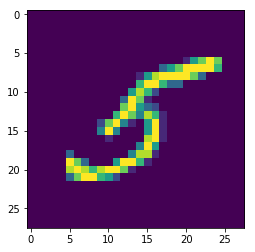

In [44]:
# Chargement des données
import scipy.io as sio

digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

plt.imshow(Xa[35].reshape(28,28)) #affichage d'une image 

tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

# les données app sont ensuite re-decoupées en app et validation (proportion au choix)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

In [129]:
kf = KFold(n_splits=10) #k=10
i = 1

vectC = [0.0001,  0.001,  0.01,  0.1, 1, 100, 1000, 10000]

perf_val = [[], [], [], [], [], [], [], [], [] ,[]]
decoupage = 0

for train , valid in kf.split(Xa):
    X_train = Xa[train,:]
    Y_train = Ya[train]
    X_valid = Xa[valid,:]
    Y_valid = Ya[valid]
    
    for c in vectC :
        clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
        clf_reglog.C = c
        clf_reglog.fit(X_train, Y_train)
        perf_val[decoupage].append(1 - accuracy_score(Y_valid, clf_reglog.predict(X_valid)))
    decoupage += 1
    
perf_globale = np.zeros((len(vectC), 1))
for i in range(0, len(vectC)):
    perf_globale[i] = perf_val[0][i] + perf_val[1][i] + perf_val[2][i] + perf_val[3][i] + perf_val[4][i] + perf_val[5][i] + perf_val[6][i] + perf_val[7][i] + perf_val[8][i] + perf_val[9][i] 
    perf_globale[i] /= 10
c_opt = vectC[np.argmin(perf_globale)]
print('Le C optimal est %.4f. ' %c_opt)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Le C optimal est 0.0010. 


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Le C optimal est 0.0010.

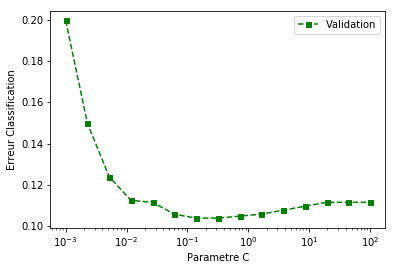

In [50]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, perf_globale, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
#plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')

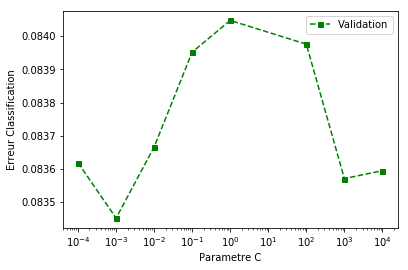

In [130]:
#%% #### Trace des courbes d'erreur d'apprentissage
plt.figure()
plt.semilogx(vectC, perf_globale, color='green', linestyle='--', marker='s', markersize=5, label='Validation')
#plt.semilogx(vectC, err_app, color='blue', linestyle='--', marker='s', markersize=5, label='Apprentissage')
plt.xlabel('Parametre C')
plt.ylabel('Erreur Classification')
plt.legend(loc='best')

In [132]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
clf_reglog.C = c_opt
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(c_opt ))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))
print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Valeur de Copt = 0.001
Err classification en test correspondante = 7.950000000000001
Err classification en apprentissage correspondante = 6.407142857142856


Nous avions obtenu avec la méthode LDA un score de classification en test de 11% de taux d'erreur. Nous trouvons ici 7.9%. La méthode de regression logistique est donc plus performante que la méthode LDA pour ce problème.
 
Nous allons maintenant déclarer un nouveau modèle pour la régression logistique en changeant les paramètres de la fonction *LogisticRegression* de *Scikit-Learn*. Nous prenons "multi_class = ovr" et "solver = liblinear". "multi_class = ovr" va permette d'ajuster pour chaque label un problème binaire. "solver = liblinear" permet une régularisation L1.

In [133]:
clf_reglog = linear_model.LogisticRegression(tol=1e-5, multi_class='ovr', solver='liblinear')
clf_reglog.C = 0.0022758459260747888
clf_reglog.fit(Xa, Ya)
print('Valeur de Copt = {}'.format(c_opt ))
print('Err classification en test correspondante = {}'.format(100*(1 - accuracy_score(Yt, clf_reglog.predict(Xt)))))
print('Err classification en apprentissage correspondante = {}'.format(100*(1 - accuracy_score(Ya, clf_reglog.predict(Xa)))))

Valeur de Copt = 0.001
Err classification en test correspondante = 8.499999999999996
Err classification en apprentissage correspondante = 6.607142857142856


On constate, sans faire une recherche d'hyper paramètre optimal, que les performances du modèle ne se détériorent pas. <br>
Il peut être néanmmoins être intéressant d'utiliser KFold ou GridSearchCV pour rechercher une valeur optimale de l'hyper paramètre C et comparer le score obtenu (cf TP3-ML1).